## Importing libraries

In [85]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

#### Data understanding

In [86]:
data = pd.read_csv("Rainfall.csv")

In [87]:
df =data.copy()

In [88]:
df.head()

,day,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,rainfall,sunshine,winddirection,windspeed
0,1,1025.9,19.9,18.3,16.8,13.1,72,49,yes,9.3,80.0,26.3
1,2,1022.0,21.7,18.9,17.2,15.6,81,83,yes,0.6,50.0,15.3
2,3,1019.7,20.3,19.3,18.0,18.4,95,91,yes,0.0,40.0,14.2
3,4,1018.9,22.3,20.6,19.1,18.8,90,88,yes,1.0,50.0,16.9
4,5,1015.9,21.3,20.7,20.2,19.9,95,81,yes,0.0,40.0,13.7


In [89]:
df.sample(5)

,day,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,rainfall,sunshine,winddirection,windspeed
356,22,1020.3,20.6,19.9,18.7,17.6,87,88,yes,0.3,60.0,27.3
221,9,998.5,34.7,31.0,26.9,24.8,71,80,yes,10.0,220.0,26.4
48,18,1021.9,15.0,13.7,11.7,11.8,89,95,yes,0.0,40.0,18.6
96,6,1013.3,26.5,23.1,21.5,21.6,91,83,no,6.9,70.0,20.0
187,6,1008.4,28.8,27.3,24.7,26.0,93,88,yes,0.5,130.0,24.8


In [90]:
data.columns

Index(['day', 'pressure ', 'maxtemp', 'temparature', 'mintemp', 'dewpoint',
       'humidity ', 'cloud ', 'rainfall', 'sunshine', '         winddirection',
       'windspeed'],
      dtype='object')

In [91]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   day                     366 non-null    int64  
 1   pressure                366 non-null    float64
 2   maxtemp                 366 non-null    float64
 3   temparature             366 non-null    float64
 4   mintemp                 366 non-null    float64
 5   dewpoint                366 non-null    float64
 6   humidity                366 non-null    int64  
 7   cloud                   366 non-null    int64  
 8   rainfall                366 non-null    object 
 9   sunshine                366 non-null    float64
 10           winddirection  365 non-null    float64
 11  windspeed               365 non-null    float64
dtypes: float64(8), int64(3), object(1)
memory usage: 34.4+ KB


In [92]:
## Check for missing values
df.isnull().sum()

day                       0
pressure                  0
maxtemp                   0
temparature               0
mintemp                   0
dewpoint                  0
humidity                  0
cloud                     0
rainfall                  0
sunshine                  0
         winddirection    1
windspeed                 1
dtype: int64

In [93]:
df.duplicated().sum()

0

In [94]:
df.describe()

,day,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,sunshine,winddirection,windspeed
count,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,365.000000,365.000000
mean,15.756831,1013.742623,26.191257,23.747268,21.894536,19.989071,80.177596,71.128415,4.419399,101.506849,21.536986
std,8.823592,6.414776,5.978343,5.632813,5.594153,5.997021,10.062470,21.798012,3.934398,81.723724,10.069712
min,1.000000,998.500000,7.100000,4.900000,3.100000,-0.400000,36.000000,0.000000,0.000000,10.000000,4.400000
25%,8.000000,1008.500000,21.200000,18.825000,17.125000,16.125000,75.000000,58.000000,0.500000,40.000000,13.700000
50%,16.000000,1013.000000,27.750000,25.450000,23.700000,21.950000,80.500000,80.000000,3.500000,70.000000,20.500000
75%,23.000000,1018.100000,31.200000,28.600000,26.575000,25.000000,87.000000,88.000000,8.200000,190.000000,27.900000
max,31.000000,1034.600000,36.300000,32.400000,30.000000,26.700000,98.000000,100.000000,12.100000,350.000000,59.500000


#### Basic insights from data
1. Column names contain some extra space.
2. Columns like winddirection and windspeed contains 1 missing value each.
3. Data do not contains any duplicate values.

Exploratory Data analysis


In [95]:
df.columns = df.columns.str.strip()

In [96]:
df.columns

Index(['day', 'pressure', 'maxtemp', 'temparature', 'mintemp', 'dewpoint',
       'humidity', 'cloud', 'rainfall', 'sunshine', 'winddirection',
       'windspeed'],
      dtype='object')

In [97]:
df = df.rename(columns = {
    "temparature" : "temperature"
})

In [98]:
df["rainfall"] = df["rainfall"].map({"no" : 0,"yes" : 1})

<Axes: xlabel='rainfall', ylabel='count'>

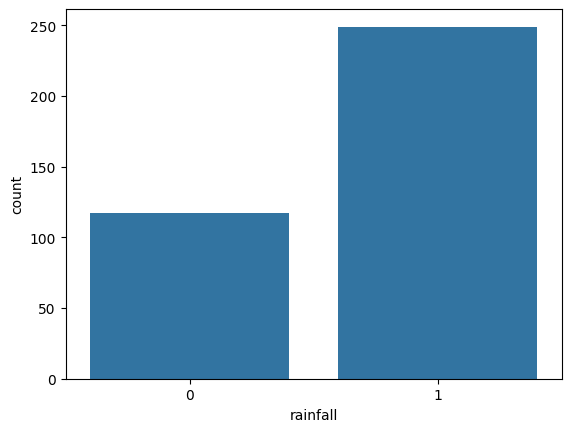

In [99]:
sns.countplot(data =df,x = "rainfall")

In [100]:
## It is clearly observable that the data is imbalance.

<Figure size 500x500 with 0 Axes>

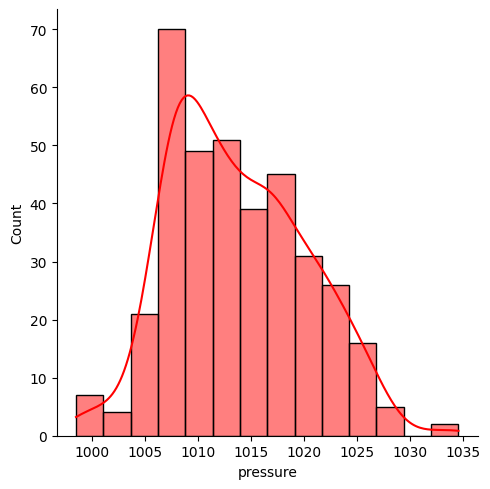

In [101]:
plt.figure(figsize =(5,5))
sns.displot(data = df,x = "pressure",kde = True,color = "red")

In [102]:
## So, the pressure is skewed positively.

<Axes: xlabel='rainfall', ylabel='pressure'>

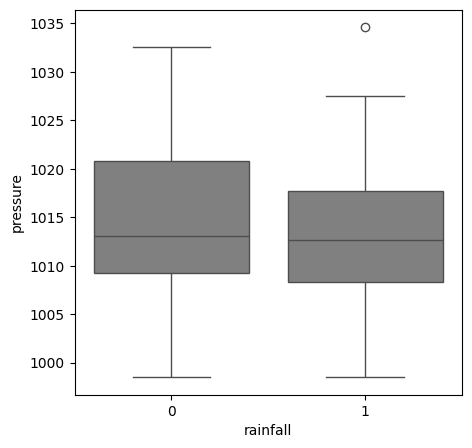

In [103]:
plt.figure(figsize=(5,5))
sns.boxplot(data = df,x = "rainfall",y = "pressure",color = "grey")

In [104]:
# Days having rainfall has slightly low pressure as compare to no rainfall.
# But the median(50th percentile) concides at approximately same value.

<Axes: xlabel='maxtemp', ylabel='Density'>

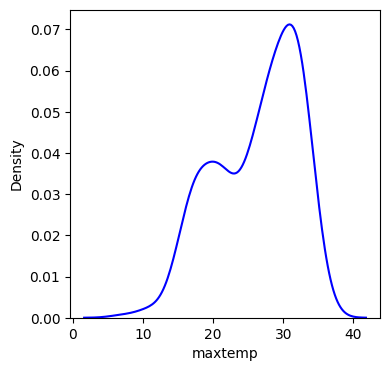

In [105]:
plt.figure(figsize=(4,4))
sns.kdeplot(data = df,x = "maxtemp",color = "blue")

In [106]:
### maxtemp is negatively skewed.

<Axes: xlabel='rainfall', ylabel='maxtemp'>

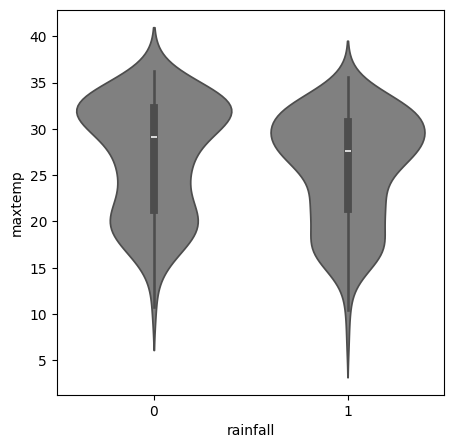

In [107]:
plt.figure(figsize = (5,5))
sns.violinplot(data= df,x = "rainfall",y ="maxtemp",color = "grey")

In [108]:
# Days having rainfall have slightly low maxtemp as compared to days woth no rainfall.

<Figure size 400x400 with 0 Axes>

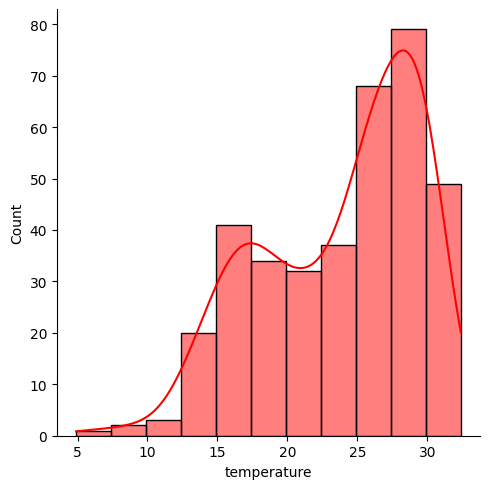

In [109]:
plt.figure(figsize = (4,4))
sns.displot(data =df,x= "temperature",color = "red",kde = True)

In [110]:
# Temperature is negatively skewed data.And mostly days have room temperature(25-30) and few days have low temperature.

<Axes: xlabel='rainfall', ylabel='temperature'>

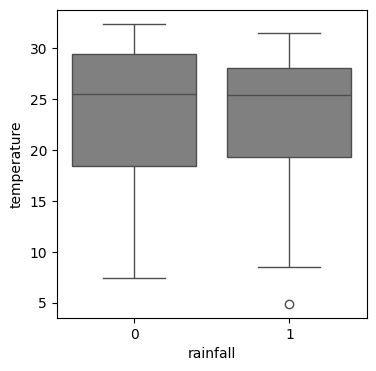

In [111]:
plt.figure(figsize=(4,4))
sns.boxplot(data = df,x = "rainfall",y="temperature",color = "grey")

In [112]:
# It is clearly observable that on both days there is not such change or difference visible.

<Figure size 400x400 with 0 Axes>

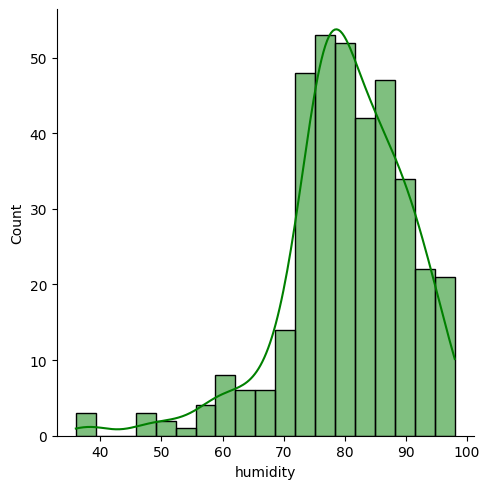

In [113]:
plt.figure(figsize = (4,4))
sns.displot(data =df,x = "humidity",kde = True,color = "green")

In [114]:
# Humidity is also negatively skewed.

<Axes: xlabel='rainfall', ylabel='humidity'>

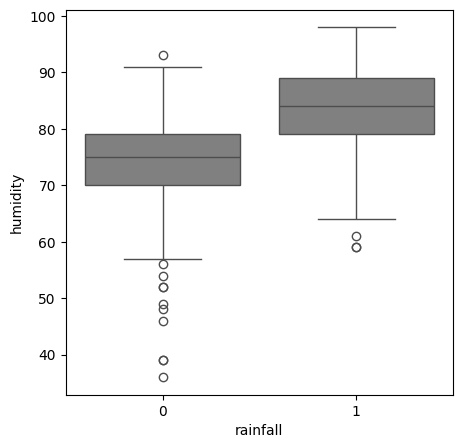

In [115]:
plt.figure(figsize=(5,5))
sns.boxplot(data = df,x ="rainfall",y = "humidity",color = "grey")

In [116]:
# Days having rainfall have high humidity whereas days having no rainfall has low humidity.

<Figure size 500x500 with 0 Axes>

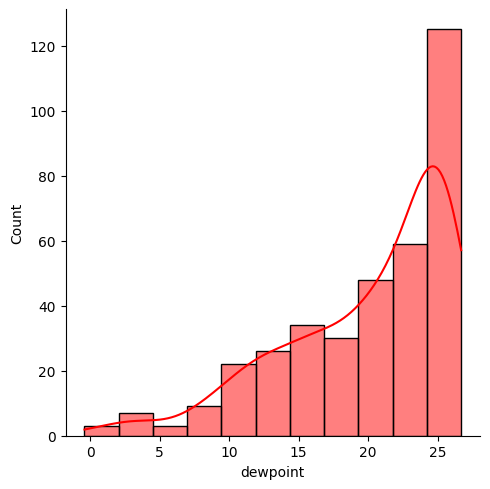

In [117]:
plt.figure(figsize = (5,5))
sns.displot(data = df,x= "dewpoint",kde = True,color = "red")

In [118]:
# Dewpoint is also negatively skewed. Mostly days have dewpoint close to 25.

<Axes: xlabel='rainfall', ylabel='dewpoint'>

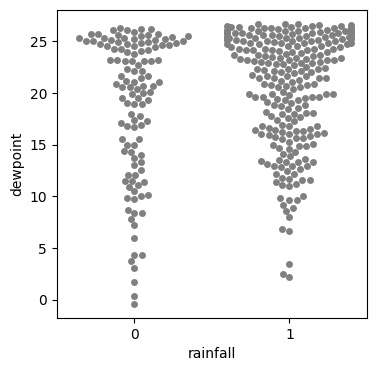

In [119]:
plt.figure(figsize= (4,4))
sns.swarmplot(data = df,x = "rainfall",y = "dewpoint",color = "grey")

<Figure size 400x400 with 0 Axes>

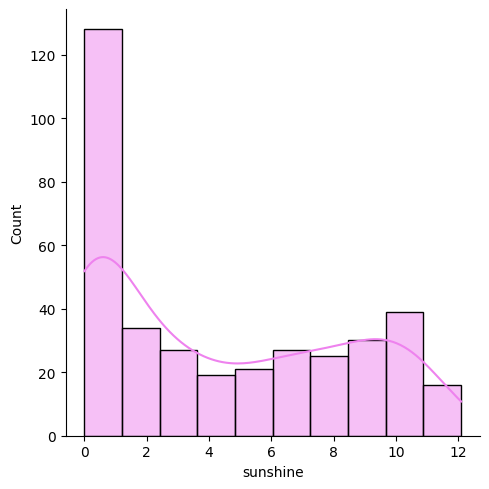

In [120]:
plt.figure(figsize = (4,4))
sns.displot(data =df,x = "sunshine",kde = True,color= "violet")

In [121]:
## Sunshine is positively skewed data.And maximum days have sunsine between 0 and 1.

<Axes: xlabel='rainfall', ylabel='sunshine'>

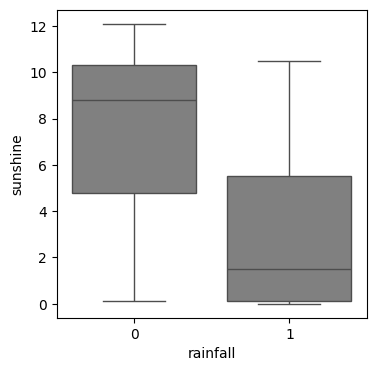

In [122]:
plt.figure(figsize = (4,4))
sns.boxplot(data = df,x= "rainfall",y = "sunshine",color = "grey")

In [123]:
# It is clearly observable that days with rainfall mainly have sunshine between 0 and 5 whereas days with no rainfall have mainly sunshine above 5

<Figure size 400x400 with 0 Axes>

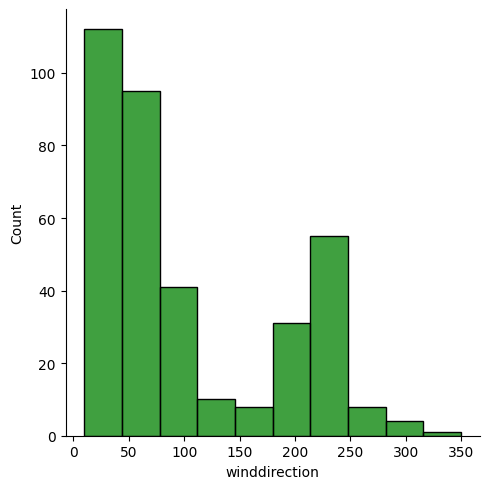

In [124]:
plt.figure(figsize = (4,4))
sns.displot(data = df,x = "winddirection",color = "green")

In [125]:
# Mostly days have winddirection less than 75.As this is also positive skewed.

<Axes: xlabel='rainfall', ylabel='winddirection'>

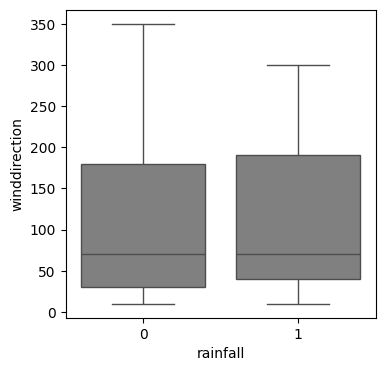

In [126]:
plt.figure(figsize= (4,4))
sns.boxplot(data = df,x = "rainfall",y ="winddirection",color ="grey")

In [127]:
# As clearly observable winddirection is similar for both of the days.

<Axes: xlabel='windspeed', ylabel='Density'>

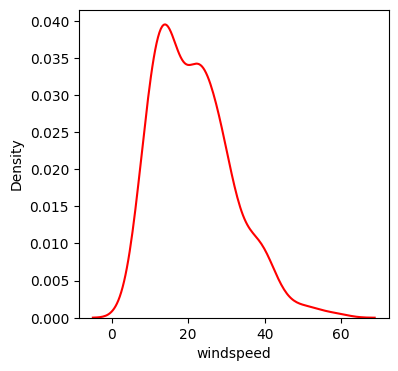

In [128]:
plt.figure(figsize = (4,4))
sns.kdeplot(data = df,x = "windspeed",color = "red")

In [129]:
# So mostly days have windspeed between 10 - 30.This is also positively skewed data.

<Axes: xlabel='rainfall', ylabel='windspeed'>

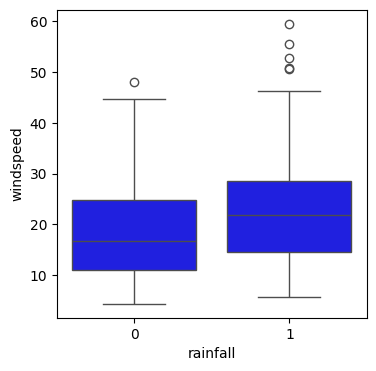

In [130]:
plt.figure(figsize = (4,4))
sns.boxplot(data =df,x= "rainfall",y = "windspeed",color = "blue")

In [131]:

# Days with rainfall have high windspeed as compared to days with no rainfall.

<Axes: xlabel='rainfall', ylabel='count'>

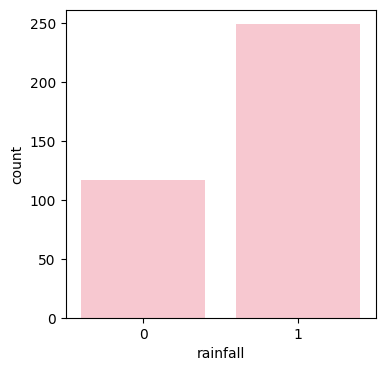

In [132]:
plt.figure(figsize = (4,4))
sns.countplot(data = df,x = "rainfall",color = "pink")

It is clearly visible that the data is imbalance.

As the data is imbalance so we can use sampling techniques like SMOTE,downsampling or upsampling.And rather than this we can model like XGBoost, and RandomForest which are inbulit specialized for imbalance data.

In [133]:
df.drop("rainfall",axis =1).corr()

,day,pressure,maxtemp,temperature,mintemp,dewpoint,humidity,cloud,sunshine,winddirection,windspeed
day,1.000000,0.044638,-0.017045,-0.014100,-0.009241,-0.051521,-0.118652,-0.113152,0.108927,0.042203,-0.031906
pressure,0.044638,1.000000,-0.829088,-0.851780,-0.839851,-0.860232,-0.274907,0.005621,-0.198171,-0.662586,0.374046
maxtemp,-0.017045,-0.829088,1.000000,0.986193,0.961534,0.899829,0.021882,-0.289765,0.507416,0.629555,-0.442357
temperature,-0.014100,-0.851780,0.986193,1.000000,0.990187,0.936866,0.092030,-0.205895,0.420545,0.648865,-0.393739
mintemp,-0.009241,-0.839851,0.961534,0.990187,1.000000,0.944515,0.139040,-0.156097,0.368288,0.633513,-0.359130
dewpoint,-0.051521,-0.860232,0.899829,0.936866,0.944515,1.000000,0.425282,0.044635,0.185234,0.628190,-0.378435
humidity,-0.118652,-0.274907,0.021882,0.092030,0.139040,0.425282,1.000000,0.655493,-0.563579,0.101237,-0.076613
cloud,-0.113152,0.005621,-0.289765,-0.205895,-0.156097,0.044635,0.655493,1.000000,-0.848334,-0.076168,0.258400
sunshine,0.108927,-0.198171,0.507416,0.420545,0.368288,0.185234,-0.563579,-0.848334,1.000000,0.253261,-0.298892
winddirection,0.042203,-0.662586,0.629555,0.648865,0.633513,0.628190,0.101237,-0.076168,0.253261,1.000000,-0.219962


Text(0.5, 1.0, 'Correlation Heatmap')

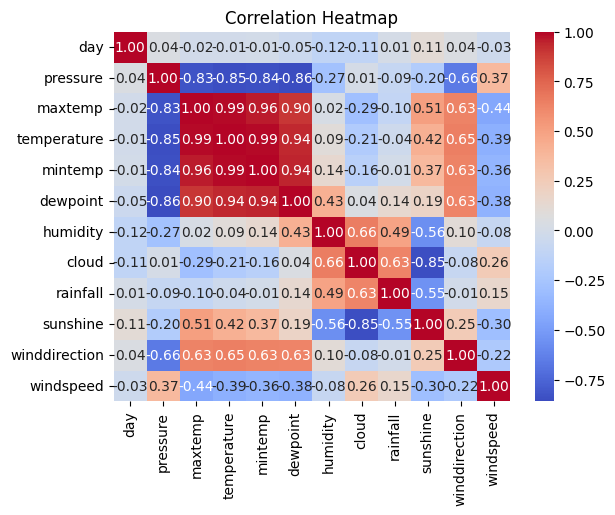

In [134]:

sns.heatmap(df.corr(),annot=True,cmap = "coolwarm",fmt= ".2f")
plt.title("Correlation Heatmap")

It is clearly visible from the correlation heatmap that maxtemp, temperature, mintemp are highly positive correlated.
Dropping these features will be good for model training.

In [135]:
df = df.drop("day",axis = 1)

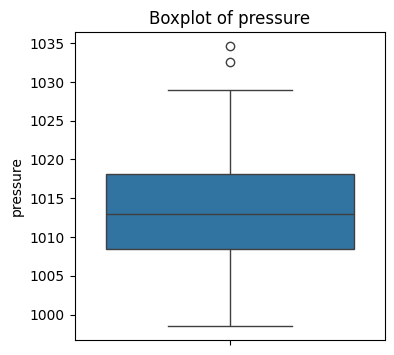

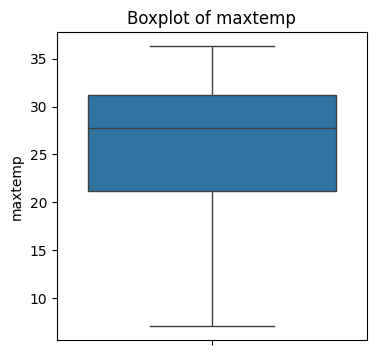

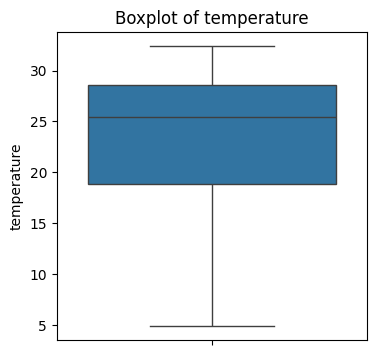

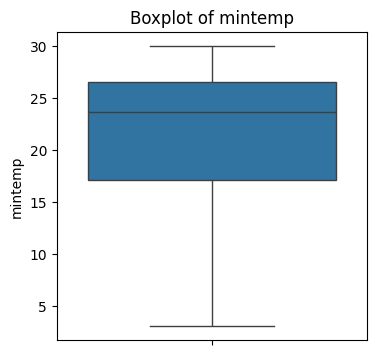

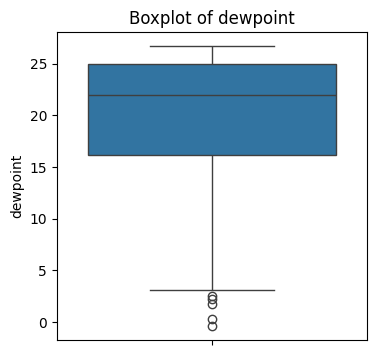

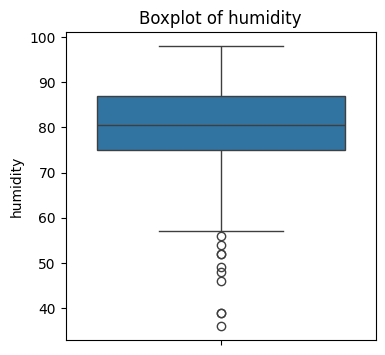

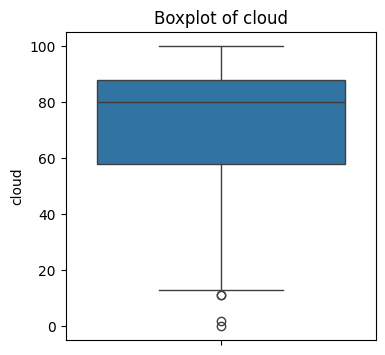

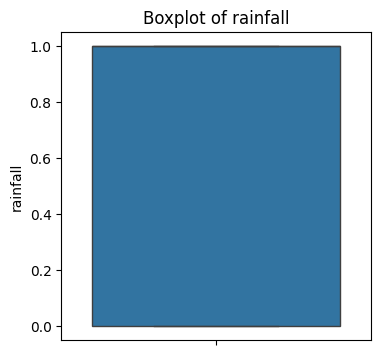

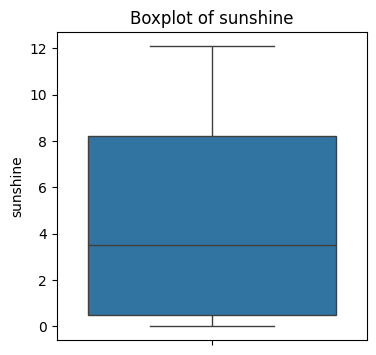

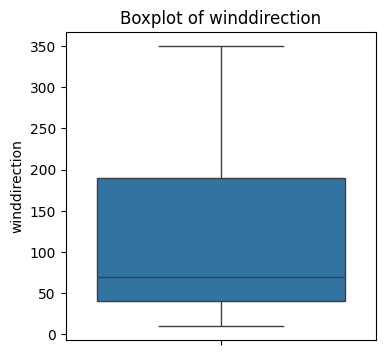

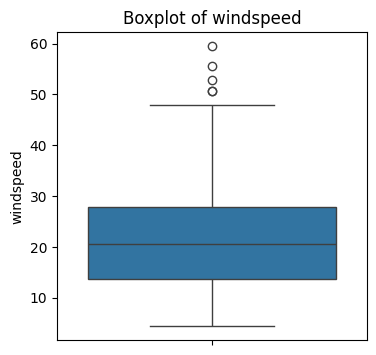

In [136]:
for column in df.columns:
    plt.figure(figsize=(4,4))
    sns.boxplot(df[column])
    plt.title(f"Boxplot of {column}")
    plt.show()

Pressure, dewpoint, humidity, cloud, windspeed contains outliers.

Data Processing

In [137]:
## Dealing with outliers
def handle_outliers(data):
    for column in data.columns:
        q1 = data[column].quantile(0.25)
        q3 = data[column].quantile(0.75)
        IQR = q3-q1

        lower_bound = q1 -1.5*IQR
        upper_bound = q3 +1.5*IQR

        data[column] = data[column].apply(lambda x: lower_bound if x<lower_bound else (upper_bound if x > upper_bound else x))

    return data


In [138]:
df = handle_outliers(df)

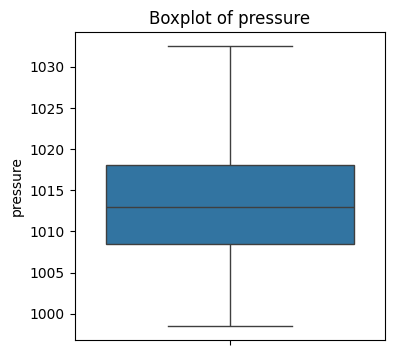

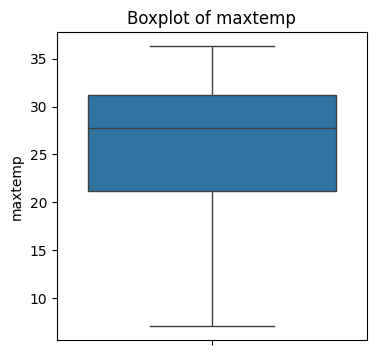

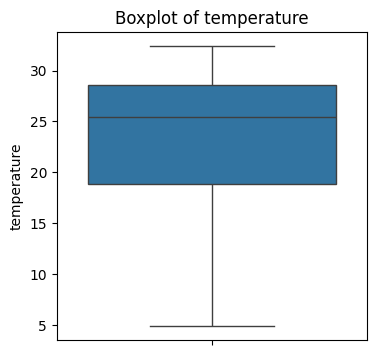

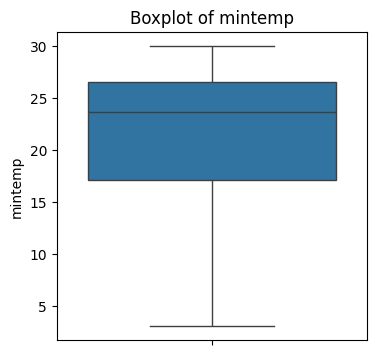

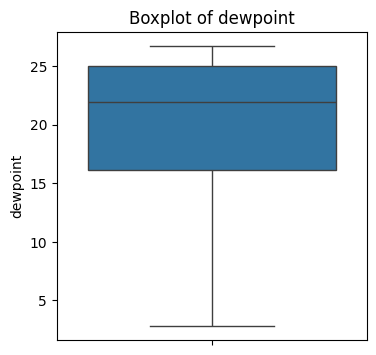

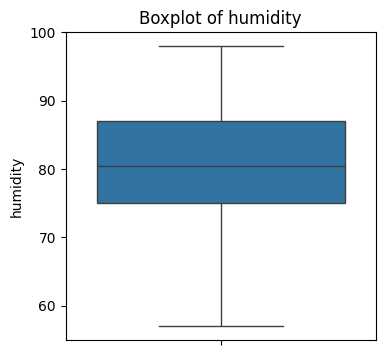

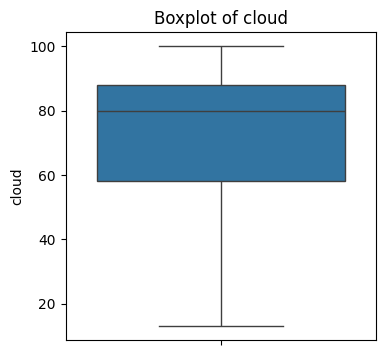

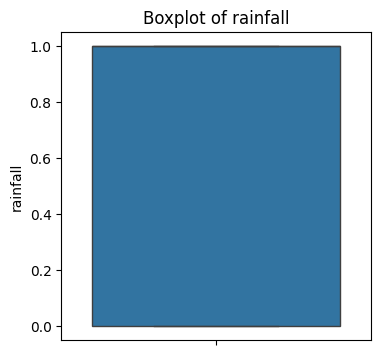

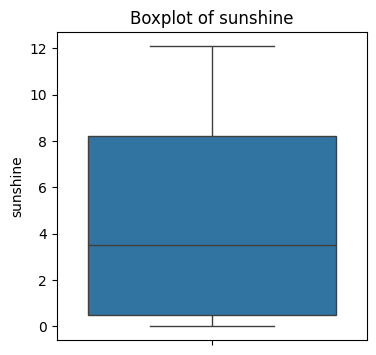

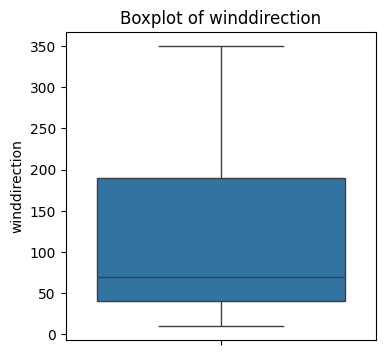

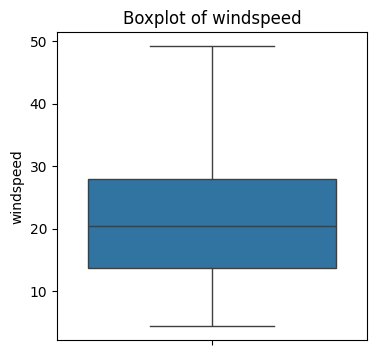

In [139]:
for column in df.columns:
    plt.figure(figsize=(4,4))
    sns.boxplot(df[column])
    plt.title(f"Boxplot of {column}")
    plt.show()

In [140]:
### All outliers and noises are removed.

In [141]:
## Dropping all highly related features.
df = df.drop(["maxtemp","temperature","mintemp"],axis =1)

In [142]:
df.head()

,pressure,dewpoint,humidity,cloud,rainfall,sunshine,winddirection,windspeed
0,1025.9,13.1,72.0,49.0,1,9.3,80.0,26.3
1,1022.0,15.6,81.0,83.0,1,0.6,50.0,15.3
2,1019.7,18.4,95.0,91.0,1,0.0,40.0,14.2
3,1018.9,18.8,90.0,88.0,1,1.0,50.0,16.9
4,1015.9,19.9,95.0,81.0,1,0.0,40.0,13.7


In [143]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   pressure       366 non-null    float64
 1   dewpoint       366 non-null    float64
 2   humidity       366 non-null    float64
 3   cloud          366 non-null    float64
 4   rainfall       366 non-null    int64  
 5   sunshine       366 non-null    float64
 6   winddirection  365 non-null    float64
 7   windspeed      365 non-null    float64
dtypes: float64(7), int64(1)
memory usage: 23.0 KB


In [144]:
## Handling with missing values.



As only two features contains 1 missing value each.So they can be replaced using median according to their data distribution.

In [145]:
df["winddirection"] = df["winddirection"].fillna(df["winddirection"].median())

In [146]:
df["windspeed"]  = df["windspeed"].fillna(df["windspeed"].median())

In [147]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   pressure       366 non-null    float64
 1   dewpoint       366 non-null    float64
 2   humidity       366 non-null    float64
 3   cloud          366 non-null    float64
 4   rainfall       366 non-null    int64  
 5   sunshine       366 non-null    float64
 6   winddirection  366 non-null    float64
 7   windspeed      366 non-null    float64
dtypes: float64(7), int64(1)
memory usage: 23.0 KB


In [148]:
df.sample(10)

,pressure,dewpoint,humidity,cloud,rainfall,sunshine,winddirection,windspeed
343,1016.8,16.8,95.0,95.0,1,0.0,60.0,35.1
340,1021.3,12.2,76.0,91.0,1,0.1,10.0,28.4
177,1009.1,26.3,75.0,57.0,1,9.9,160.0,11.9
126,1009.9,25.3,83.0,84.0,0,2.9,190.0,15.5
216,1008.3,24.1,74.0,29.0,0,5.7,10.0,4.4
196,1007.0,26.4,81.0,78.0,1,6.2,230.0,22.4
21,1018.9,12.9,92.0,100.0,1,0.0,50.0,35.3
119,1013.9,19.6,76.0,68.0,1,6.0,90.0,30.5
361,1022.7,15.0,84.0,90.0,1,0.0,30.0,18.4
106,1010.5,22.7,89.0,81.0,1,3.5,210.0,15.3


Humidity and cloud are two features that contains int data but there datatype is float.
So we can change it to int.

In [149]:
df["humidity"] = df["humidity"].astype(int)
df["cloud"] = df["cloud"].astype(int)

In [150]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   pressure       366 non-null    float64
 1   dewpoint       366 non-null    float64
 2   humidity       366 non-null    int32  
 3   cloud          366 non-null    int32  
 4   rainfall       366 non-null    int64  
 5   sunshine       366 non-null    float64
 6   winddirection  366 non-null    float64
 7   windspeed      366 non-null    float64
dtypes: float64(5), int32(2), int64(1)
memory usage: 20.1 KB


,pressure,dewpoint,humidity,cloud,rainfall,sunshine,winddirection,windspeed
count,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000
mean,1013.736612,20.010280,80.448087,71.204918,0.680328,4.419399,101.420765,21.471038
std,6.396178,5.931523,9.204899,21.573426,0.466988,3.934398,81.628312,9.857585
min,998.500000,2.812500,57.000000,13.000000,0.000000,0.000000,10.000000,4.400000
25%,1008.500000,16.125000,75.000000,58.000000,0.000000,0.500000,40.000000,13.725000
50%,1013.000000,21.950000,80.500000,80.000000,1.000000,3.500000,70.000000,20.500000
75%,1018.100000,25.000000,87.000000,88.000000,1.000000,8.200000,190.000000,27.825000
max,1032.500000,26.700000,98.000000,100.000000,1.000000,12.100000,350.000000,49.200000


Splitting data into training and testing 

In [151]:
from sklearn.model_selection import train_test_split

In [152]:
X = df.drop("rainfall",axis = 1)

In [153]:
y = df.rainfall

In [154]:
print(X)

     pressure  dewpoint  humidity  cloud  sunshine  winddirection  windspeed
0      1025.9      13.1        72     49       9.3           80.0       26.3
1      1022.0      15.6        81     83       0.6           50.0       15.3
2      1019.7      18.4        95     91       0.0           40.0       14.2
3      1018.9      18.8        90     88       1.0           50.0       16.9
4      1015.9      19.9        95     81       0.0           40.0       13.7
..        ...       ...       ...    ...       ...            ...        ...
361    1022.7      15.0        84     90       0.0           30.0       18.4
362    1026.6      12.8        75     85       1.0           20.0       25.9
363    1025.9      13.3        75     78       4.6           70.0       33.4
364    1025.3      13.3        78     86       1.2           20.0       20.9
365    1026.4      13.0        74     66       5.7           20.0       23.3

[366 rows x 7 columns]


In [155]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state= 4)

Scaling the data using StandardScaler

In [156]:
from sklearn.preprocessing import StandardScaler

In [157]:
scaler = StandardScaler()

In [158]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [159]:
print(X_train)

[[-0.09533822 -0.37449381  1.79142807 ... -1.0250819  -0.78214504
   0.08185364]
 [-0.68901786  0.84841806  0.074949   ...  0.5485705   0.06552435
  -1.09623704]
 [ 1.74988228 -2.28424661 -1.74881001 ... -1.17737085 -1.02433629
   1.22999287]
 ...
 [-0.84947182  1.03269246 -0.13961088 ...  0.98005584  1.63976748
   0.39135204]
 [-0.80133563  0.74790476 -0.89057048 ...  1.71611906  1.27648061
  -1.15613996]
 [-0.38415535  0.56363037  0.93318854 ... -0.66974104 -0.66104941
  -1.00638267]]


Model Training

RandomForest and XgBoost will be trained.

In [160]:
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import precision_score,recall_score,f1_score,confusion_matrix

In [161]:
from sklearn.model_selection import GridSearchCV

In [162]:
param_grids = {
    "XGBClassifier" : {
        "model" : XGBClassifier(),
        "params" :{
            "n_estimators" : [50,100],
            "max_depth" : [3,5],
            "learning_rate": [0.01,0.1]
        }
    },
    "Random Forest": {
        "model": RandomForestClassifier(),
        "params" :{
            "n_estimators" : [50,100],
            "max_depth" : [3,5],
            "min_samples_split": [2,5]

        }
    }
}

best_models = {}
for name,config in param_grids.items():
    print(f"Tunning hyperparameters for {name}...")
    grid_search = GridSearchCV(estimator = config["model"],param_grid=config["params"],cv= 3,scoring="accuracy")
    grid_search.fit(X_train,y_train)
    best_models[name] = grid_search.best_estimator_
    print(f"Best parameters for {name}: {grid_search.best_params_}\n")

for name,model in best_models.items():
    y_pred = model.predict(X_test)
    precision = precision_score(y_test,y_pred)
    recall = recall_score(y_test,y_pred)
    F1_score = f1_score(y_test,y_pred)

    print(f"{name} Precision: {precision}\n Recall : {recall}\n F1_Score :{F1_score}")

Tunning hyperparameters for XGBClassifier...
Best parameters for XGBClassifier: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 50}

Tunning hyperparameters for Random Forest...
Best parameters for Random Forest: {'max_depth': 3, 'min_samples_split': 5, 'n_estimators': 50}

XGBClassifier Precision: 0.7903225806451613
 Recall : 0.98
 F1_Score :0.875
Random Forest Precision: 0.7903225806451613
 Recall : 0.98
 F1_Score :0.875


In [168]:
xgb_model = best_models["XGBClassifier"]

Load the saved model 

In [164]:
import pickle as pkl

In [165]:
with open("xgboost_best_model.pkl","wb") as file:
    pkl.dump(xgb_model,file)